In [38]:
import pandas as pd
import numpy as np
import bilby
import pickle

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import rcParams

In [39]:
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Palatino Linotype', 'Palatino', 'TeX Gyre Pagella', 'Times New Roman']
rcParams['font.sans-serif'] = ['Helvetica', 'Arial']
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Palatino'
rcParams['mathtext.it'] = 'Palatino:italic'
rcParams['mathtext.bf'] = 'Palatino:bold'

In [40]:
rcParams['text.usetex'] = True
rcParams['font.serif'] = 'Computer Modern Roman'
rcParams['font.family'] = 'serif'
rcParams['axes.formatter.useoffset'] = False

matplotlib.rc('xtick', labelsize = 23) 
matplotlib.rc('ytick', labelsize = 23)

In [41]:
path_to_plots = 'plots/'

## Note on **icarogw** run results
All the data have been stored as path to .json files:
1. Vanilla case: `'/home/ulyana.dupletsa/MDC-Paper1/data/case1_events_dictionary.pkl'`
2. Redshuft-dependent case: `'/home/ulyana.dupletsa/MDC-Paper1/data/case2_events_dictionary.pkl'`
To open and browse them see cell below:

In [42]:
# example with vanilla-case pe data from icarogw
with open('/home/ulyana.dupletsa/MDC-Paper1/data/case1_events_dictionary.pkl', 'rb') as f:
    vanilla_dict = pickle.load(f)
print('Available dictionaries:', vanilla_dict.keys())
print('Runs with varying number of events:', vanilla_dict['case1_events_number'].keys())

Available dictionaries: dict_keys(['case1_events_sample_reshuffled', 'case1_events_sample', 'case1_events_number', 'case1_inj_number', 'case1_inj_sample', 'case1_zbins', 'case1_zbins_case2', 'case1_larger_priors'])
Runs with varying number of events: dict_keys(['case1_1e5inj_150ev', 'case1_1e5inj_180ev', 'case1_1e5inj_200ev', 'case1_1e5inj_220ev', 'case1_1e5inj_250ev', 'case1_1e5inj_286ev'])


## General plotting functions

In [43]:
my_color = '#2f4f4f'
my_bin_num = 50

In [44]:
# one parameter histogram
def param_histogram(param, event_list, lbl_list, fig_label = ' ', leg_title=None, leg_ncols=2, yshift=1.125, save_fig_path = False):
    
    alpha_values = np.linspace(0.35, 1.0, len(event_list))
    
    fig, ax = plt.subplots(1,1)
    for j, (name, event_path) in enumerate(event_list.items()):
        data = bilby.core.result.read_in_result(event_path)
        data_posteriors = data.posterior[columns_lbs]
        
        sns.histplot(data_posteriors[param], bins = my_bin_num, fill = False, stat = 'density',
                alpha = alpha_values[j], element = 'step', color = my_color,
                linewidth = 3.0, label = lbl_list[name])
        plt.axvline(injected_values_redshift[param], color = 'black', linewidth = 1.5, linestyle = 'dashed')
    
    plt.yscale('log')
    plt.xlabel('%s' %lbs_dict[param], fontsize = 24)
    plt.ylabel('Probability', fontsize = 24)
   
    fig.legend(title=leg_title, title_fontsize=24,
               loc = 'center', ncol = leg_ncols, bbox_to_anchor = (0.55, yshift), fontsize = 24, frameon=False)

    
    fig.tight_layout()
    if save_fig_path:
        plt.savefig(path_to_plots + '/' + 'posteriors_%s%s.pdf' %(fig_label, param), bbox_inches='tight')
    plt.show()
    plt.close()

In [45]:
injected_values_redshift = {'H0':173.28, 
                   'Om0':0.3, 
                   'alpha':5.325, 
                   'beta':3.05, 
                   'mmin':7.8, 
                   'mmax':87.58, 
                   'delta_m':3.19, 
                   'mu_g':40.9, 
                   'sigma_g':7.63, 
                   'lambda_peak':0.04, 
                   'gamma':0.03, 
                   'kappa':2.92, 
                   'zp':3.86,
                   'R0':16.1}

In [46]:
columns_lbs = ['H0', 'Om0', 'alpha', 'beta', 'mmin', 'mmax', 'delta_m', 'mu_g', 'sigma_g', 'lambda_peak',
               'gamma', 'kappa', 'zp', 'R0']
lbs = [ '$H_0$',#\n [km s$^{-1}$ Mpc$^{-1}$]', 
        '$\\Omega_{\\rm m,0}$', 
        '$\\alpha$', 
        '$\\beta$', 
        '$m_{\\rm min}$',#\n [$M_{\odot}$]', 
        '$m_{\\rm max}$',#\n [$M_{\odot}$]', 
        '$\\delta m$',#\n [$M_{\odot}$]', 
        '$\\mu_{\\rm g}$',#\n [$M_{\odot}$]', 
        '$\\sigma_{\\rm g}$',#\n [$M_{\odot}$]', 
        '$\\lambda_{\\rm peak}$', 
        '$\gamma$', 
        '$\kappa$', 
        '$z_{\\rm p}$', 
        '$R_0$']#\n [Gpc$^{-3}$yr$^{-1}$]']

lbs_dict = {'H0':'$H_0$ [km s$^{-1}$ Mpc$^{-1}$]', 
        'Om0':'$\\Omega_{\\rm m,0}$', 
        'alpha':'$\\alpha$', 
        'beta':'$\\beta$', 
        'mmin':'$m_{\\rm min}$ [$M_{\odot}$]', 
        'mmax':'$m_{\\rm max}$ [$M_{\odot}$]', 
        'delta_m':'$\\delta m$ [$M_{\odot}$]', 
        'mu_g':'$\\mu_{\\rm g}$ [$M_{\odot}$]', 
        'sigma_g':'$\\sigma_{\\rm g}$ [$M_{\odot}$]', 
        'lambda_peak':'$\\lambda_{\\rm peak}$', 
        'gamma':'$\gamma$', 
        'kappa':'$\kappa$', 
        'zp':'$z_{\\rm p}$', 
        'R0':'$R_0$ [Gpc$^{-3}$yr$^{-1}$]'}

## Redshift-dependent case

In [47]:
# load dictionary of events
case2_dictionary_path = '/home/ulyana.dupletsa/MDC-Paper1/data/case2_events_dictionary.pkl'
with open(case2_dictionary_path, 'rb') as f:
    case2_dict = pickle.load(f)
    
# load dictionary of labels 
case2_dictionary_path = '/home/ulyana.dupletsa/MDC-Paper1/data/case2_events_lbl_dictionary.pkl'
with open(case2_dictionary_path, 'rb') as f:
    case2_lbl_dict = pickle.load(f)

In [48]:
case2_dict.keys()

dict_keys(['case2_events_sample', 'case2_events_number', 'case2_inj_number', 'case2_zbin', 'case2_prior_tests'])

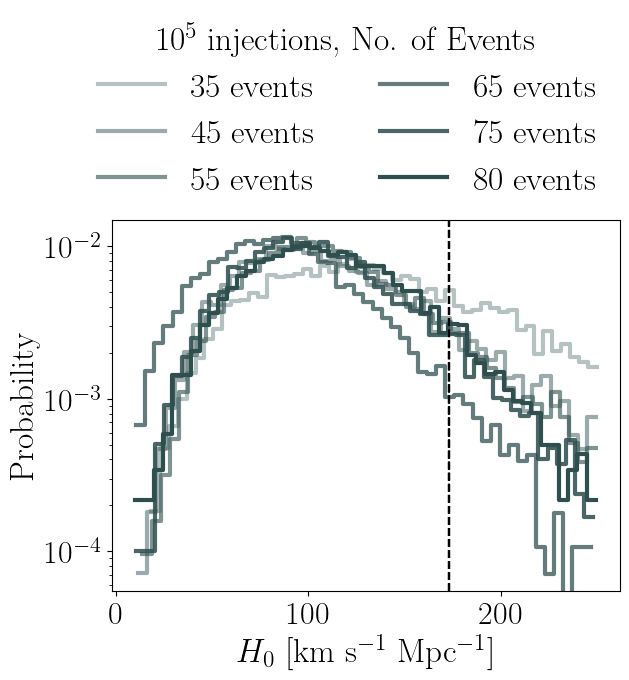

In [49]:
param_histogram('H0', case2_dict['case2_events_number'], case2_lbl_dict['case2_events_number'], 'case2_events_number', 
               '$10^5$ injections, No. of Events', 2, 1.2, True)